In [1]:
# ======================
# IMPORTS
# ======================
import numpy as np
import pandas as pd
import os
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.model_selection import train_test_split
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

In [2]:
# ======================
# DATA LOADING
# ======================
with_mask_path = 'data/with_mask'
without_mask_path = 'data/without_mask'

with_mask_files = os.listdir(with_mask_path)
without_mask_files = os.listdir(without_mask_path)

print('With mask samples:', with_mask_files[:5])
print('Without mask samples:', without_mask_files[:5])
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

With mask samples: ['with_mask_1.jpg', 'with_mask_10.jpg', 'with_mask_100.jpg', 'with_mask_1000.jpg', 'with_mask_1001.jpg']
Without mask samples: ['without_mask_1.jpg', 'without_mask_10.jpg', 'without_mask_100.jpg', 'without_mask_1000.jpg', 'without_mask_1001.jpg']
Number of with mask images: 3725
Number of without mask images: 3828


In [3]:
# ======================
# DATA LOADING
# ======================
with_mask_path = 'data/with_mask'
without_mask_path = 'data/without_mask'

with_mask_files = os.listdir(with_mask_path)
without_mask_files = os.listdir(without_mask_path)

print('With mask samples:', with_mask_files[:5])
print('Without mask samples:', without_mask_files[:5])
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

With mask samples: ['with_mask_1.jpg', 'with_mask_10.jpg', 'with_mask_100.jpg', 'with_mask_1000.jpg', 'with_mask_1001.jpg']
Without mask samples: ['without_mask_1.jpg', 'without_mask_10.jpg', 'without_mask_100.jpg', 'without_mask_1000.jpg', 'without_mask_1001.jpg']
Number of with mask images: 3725
Number of without mask images: 3828


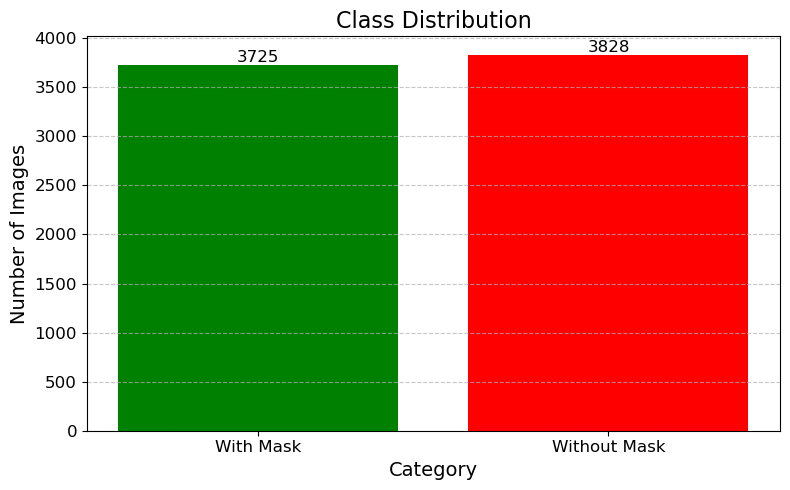

In [4]:
# ======================
# CLASS DISTRIBUTION PLOT
# ======================
plt.figure(figsize=(8, 5))
bars = plt.bar(['With Mask', 'Without Mask'], 
               [len(with_mask_files), len(without_mask_files)],
               color=['green', 'red'])
plt.title('Class Distribution', fontsize=16)
plt.ylabel('Number of Images', fontsize=14)
plt.xlabel('Category', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\Dildar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dildar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dildar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


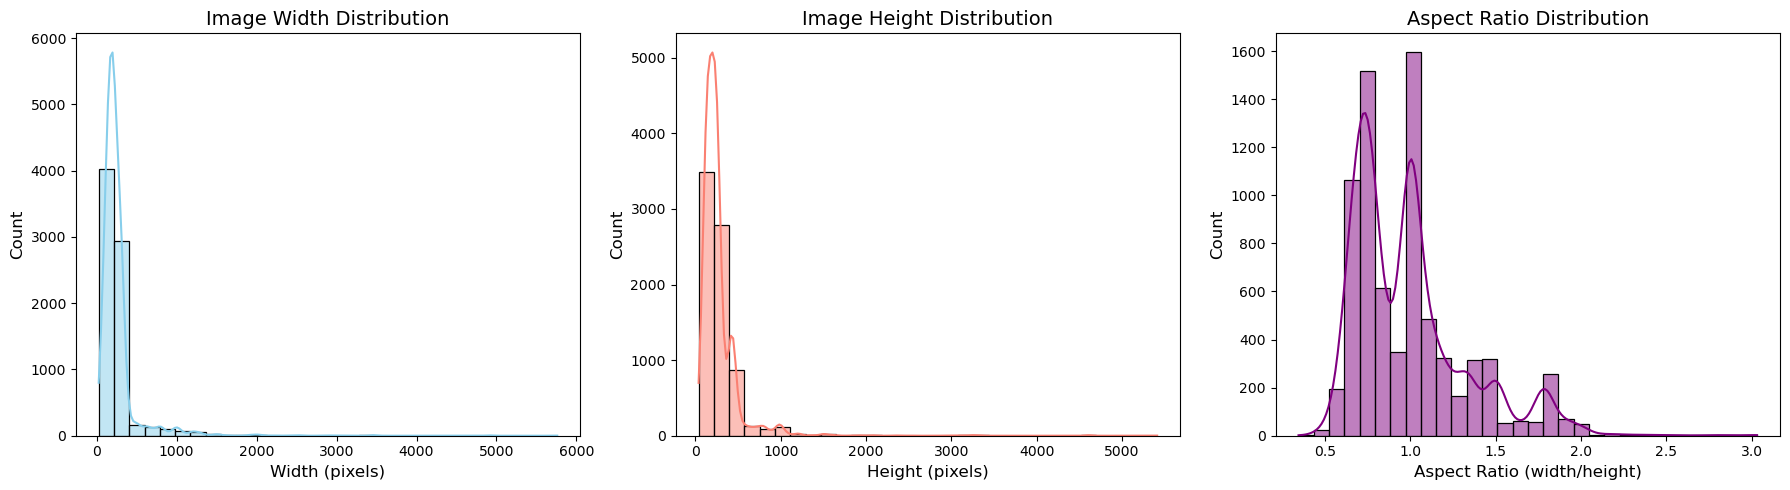


Image Dimension Analysis:
Width Range: 26 to 5760 pixels
Height Range: 37 to 5412 pixels
Average Aspect Ratio: 0.99


In [5]:
# ======================
# IMAGE DIMENSION ANALYSIS
# ======================
def get_image_dimensions(folder):
    widths = []
    heights = []
    for file in os.listdir(folder):
        path = os.path.join(folder, file)
        try:
            with Image.open(path) as img:
                width, height = img.size
                widths.append(width)
                heights.append(height)
        except:
            continue
    return widths, heights

with_mask_widths, with_mask_heights = get_image_dimensions(with_mask_path)
without_mask_widths, without_mask_heights = get_image_dimensions(without_mask_path)

all_widths = with_mask_widths + without_mask_widths
all_heights = with_mask_heights + without_mask_heights
aspect_ratios = [w/h for w, h in zip(all_widths, all_heights)]

plt.figure(figsize=(18, 5))

# Width distribution
plt.subplot(1, 3, 1)
sns.histplot(all_widths, bins=30, kde=True, color='skyblue')
plt.title("Image Width Distribution", fontsize=14)
plt.xlabel("Width (pixels)", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Height distribution
plt.subplot(1, 3, 2)
sns.histplot(all_heights, bins=30, kde=True, color='salmon')
plt.title("Image Height Distribution", fontsize=14)
plt.xlabel("Height (pixels)", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Aspect ratio distribution
plt.subplot(1, 3, 3)
sns.histplot(aspect_ratios, bins=30, kde=True, color='purple')
plt.title("Aspect Ratio Distribution", fontsize=14)
plt.xlabel("Aspect Ratio (width/height)", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.tight_layout()
plt.show()

print("\nImage Dimension Analysis:")
print(f"Width Range: {min(all_widths)} to {max(all_widths)} pixels")
print(f"Height Range: {min(all_heights)} to {max(all_heights)} pixels")
print(f"Average Aspect Ratio: {np.mean(aspect_ratios):.2f}")


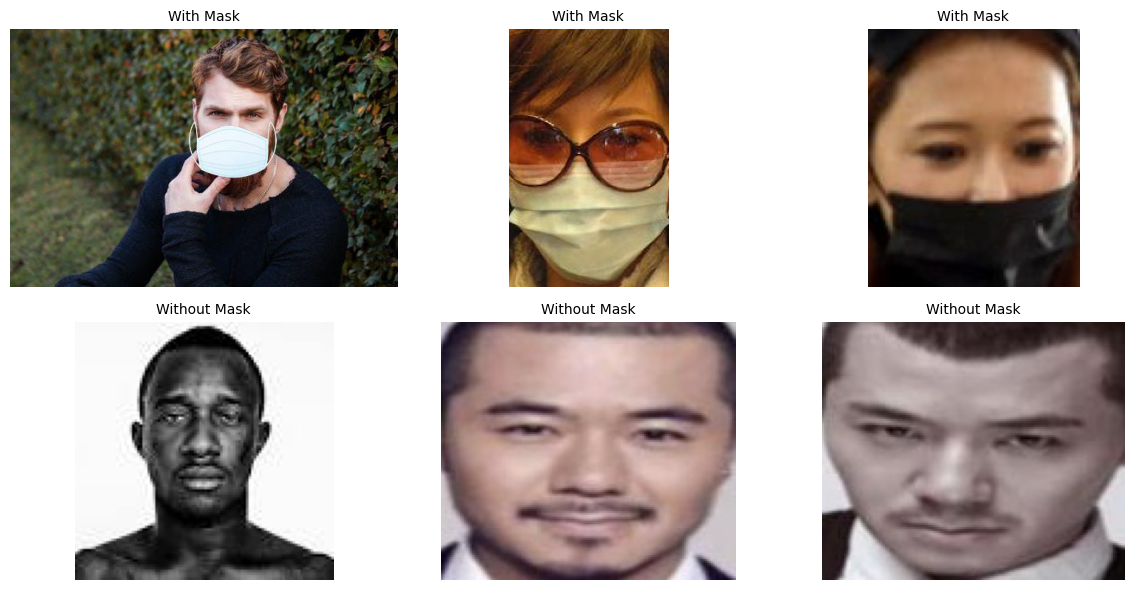

In [6]:
# ======================
# SAMPLE IMAGES VISUALIZATION
# ======================
def display_sample_images(mask_path, no_mask_path, num_samples=3):
    plt.figure(figsize=(12, 6))
    
    for i in range(num_samples):
        # With mask
        plt.subplot(2, num_samples, i+1)
        mask_img = mpimg.imread(os.path.join(mask_path, with_mask_files[i]))
        plt.imshow(mask_img)
        plt.title("With Mask", fontsize=10)
        plt.axis('off')
        
        # Without mask
        plt.subplot(2, num_samples, i+num_samples+1)
        no_mask_img = mpimg.imread(os.path.join(no_mask_path, without_mask_files[i]))
        plt.imshow(no_mask_img)
        plt.title("Without Mask", fontsize=10)
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

display_sample_images(with_mask_path, without_mask_path)

In [7]:
# ======================
# DATA PREPROCESSING
# ======================
def load_images(folder, label, img_size=(128, 128)):
    images = []
    labels = []
    for file in os.listdir(folder):
        path = os.path.join(folder, file)
        try:
            img = cv2.imread(path)
            if img is not None:
                img = cv2.resize(img, img_size)
                img = img_to_array(img)
                images.append(img)
                labels.append(label)
        except Exception as e:
            print(f"Error loading {path}: {e}")
    return images, labels

with_mask_images, with_mask_labels = load_images(with_mask_path, 1)
without_mask_images, without_mask_labels = load_images(without_mask_path, 0)

X = np.array(with_mask_images + without_mask_images, dtype="float32") / 255.0
y = np.array(with_mask_labels + without_mask_labels)

X, y = shuffle(X, y, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nFinal Dataset Shapes:")
print(f"Training: {X_train.shape}, {y_train.shape}")
print(f"Testing: {X_test.shape}, {y_test.shape}")


Final Dataset Shapes:
Training: (6042, 128, 128, 3), (6042,)
Testing: (1511, 128, 128, 3), (1511,)


In [8]:
# ======================
# MODEL BUILDING
# ======================
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    BatchNormalization(),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

C:\Users\Dildar\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 63, 63, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 30, 30, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 14, 14, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,313,857 (12.64 MB)

 Trainable params: 3,313,409 (12.64 MB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/2
170/170 ━━━━━━━━━━━━━━━━━━━━ 38s 208ms/step - accuracy: 0.7586 - loss: 1.5144 - val_accuracy: 0.6860 - val_loss: 0.5922
Epoch 2/2
170/170 ━━━━━━━━━━━━━━━━━━━━ 39s 228ms/step - accuracy: 0.8497 - loss: 0.6467 - val_accuracy: 0.6512 - val_loss: 0.6649


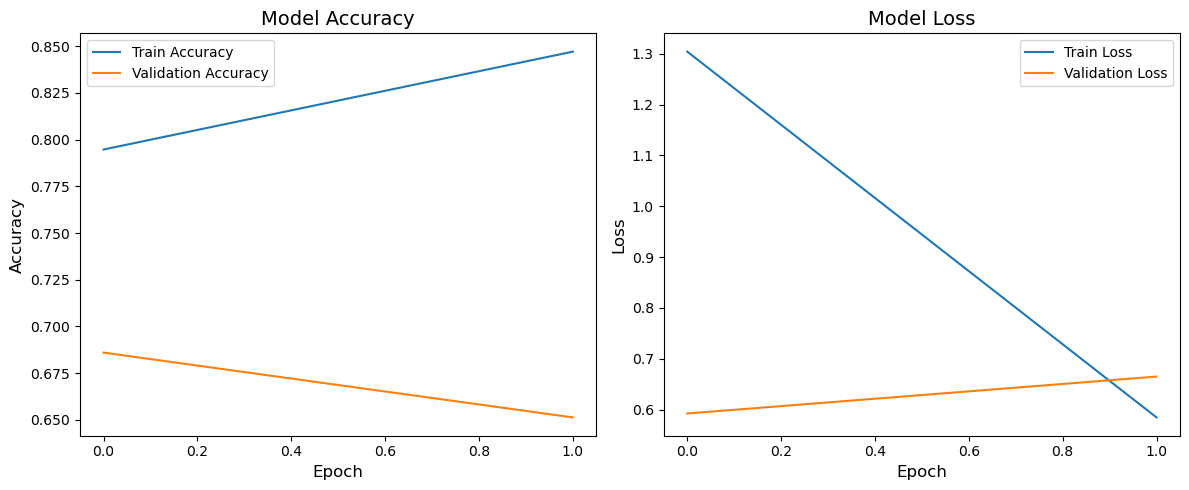

In [9]:
# MODEL TRAINING
# ======================
history = model.fit(X_train, y_train,
                    validation_split=0.1,
                    epochs=2,
                    batch_size=32)

# ======================
# TRAINING VISUALIZATION
# ======================
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy', fontsize=14)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss', fontsize=14)
plt.ylabel('Loss', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend()

plt.tight_layout()
plt.show()

48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.6637 - loss: 0.6356

Test Accuracy: 0.6625
Test Loss: 0.6393
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step


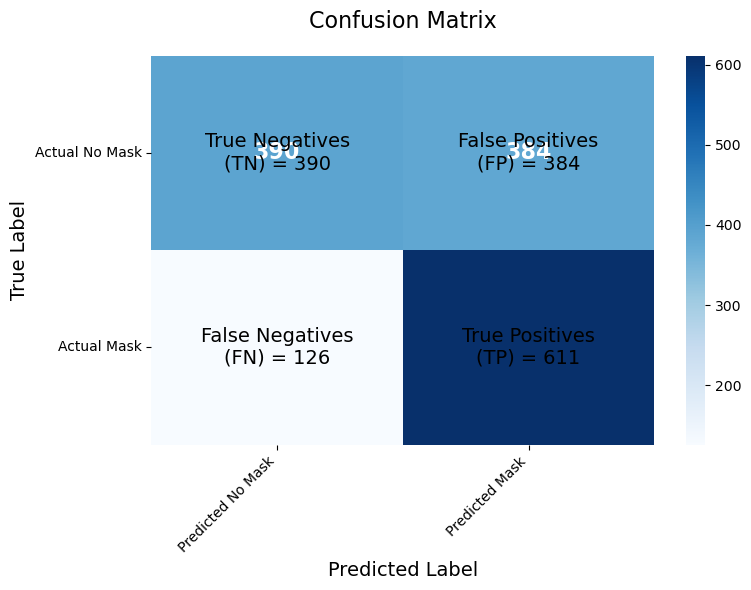


CONFUSION MATRIX METRICS CALCULATION
True Negatives (TN)      : 390
False Positives (FP)     : 384
False Negatives (FN)     : 126
True Positives (TP)      : 611
Total Samples            : 1511
Accuracy                 : 0.6625
Precision                : 0.6141
Recall (Sensitivity)     : 0.8290
Specificity              : 0.5039
F1-Score                 : 0.7055


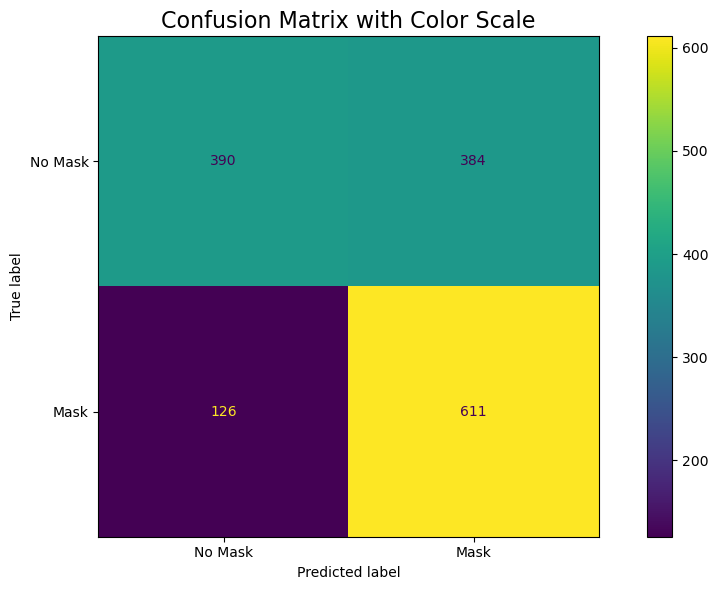

In [14]:
# ======================
# MODEL EVALUATION
# ======================
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {accuracy:.4f}")
print(f"Test Loss: {loss:.4f}")

# ======================
# PRECISE CONFUSION MATRIX CALCULATION
# ======================
from sklearn.metrics import confusion_matrix

# Generate predictions
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Calculate raw confusion matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()  # Extract all values

# Create labeled visualization
plt.figure(figsize=(8, 6))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                 xticklabels=['Predicted No Mask', 'Predicted Mask'],
                 yticklabels=['Actual No Mask', 'Actual Mask'],
                 annot_kws={'size': 16, 'weight': 'bold'})

# Add precise value labels
ax.text(0.5, 0.5, f'True Negatives\n(TN) = {tn}', 
        ha='center', va='center', fontsize=14, color='black')
ax.text(1.5, 0.5, f'False Positives\n(FP) = {fp}', 
        ha='center', va='center', fontsize=14, color='black')
ax.text(0.5, 1.5, f'False Negatives\n(FN) = {fn}', 
        ha='center', va='center', fontsize=14, color='black')
ax.text(1.5, 1.5, f'True Positives\n(TP) = {tp}', 
        ha='center', va='center', fontsize=14, color='black')

plt.title('Confusion Matrix', fontsize=16, pad=20)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# ======================
# METRICS CALCULATION FROM CONFUSION MATRIX
# ======================
confusion_metrics = {
    'True Negatives (TN)': tn,
    'False Positives (FP)': fp,
    'False Negatives (FN)': fn,
    'True Positives (TP)': tp,
    'Total Samples': tn + fp + fn + tp,
    'Accuracy': (tp + tn) / (tp + tn + fp + fn),
    'Precision': tp / (tp + fp),
    'Recall (Sensitivity)': tp / (tp + fn),
    'Specificity': tn / (tn + fp),
    'F1-Score': 2 * tp / (2 * tp + fp + fn)
}

# Print metrics in a fucking table
print("\n" + "="*60)
print("CONFUSION MATRIX METRICS CALCULATION")
print("="*60)
for metric, value in confusion_metrics.items():
    if metric in ['Accuracy', 'Precision', 'Recall (Sensitivity)', 'Specificity', 'F1-Score']:
        print(f"{metric:<25}: {value:.4f}")
    else:
        print(f"{metric:<25}: {value}")

# ======================
# ALTERNATIVE VISUALIZATION
# ======================
fig, ax = plt.subplots(figsize=(10, 6))
matrix_display = ConfusionMatrixDisplay(cm, 
                                      display_labels=['No Mask', 'Mask'])
matrix_display.plot(ax=ax, cmap='viridis', values_format='d')
plt.title('Confusion Matrix with Color Scale', fontsize=16)
plt.grid(False)
plt.tight_layout()
plt.show()


48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step

DETAILED CLASSIFICATION REPORT
              precision    recall  f1-score   support

     No Mask     0.7558    0.5039    0.6047       774
        Mask     0.6141    0.8290    0.7055       737

    accuracy                         0.6625      1511
   macro avg     0.6849    0.6665    0.6551      1511
weighted avg     0.6867    0.6625    0.6539      1511


Tabular Format:
              precision  recall  f1-score   support
No Mask          0.7558  0.5039    0.6047  774.0000
Mask             0.6141  0.8290    0.7055  737.0000
accuracy         0.6625  0.6625    0.6625    0.6625
macro avg        0.6849  0.6665    0.6551 1511.0000
weighted avg     0.6867  0.6625    0.6539 1511.0000


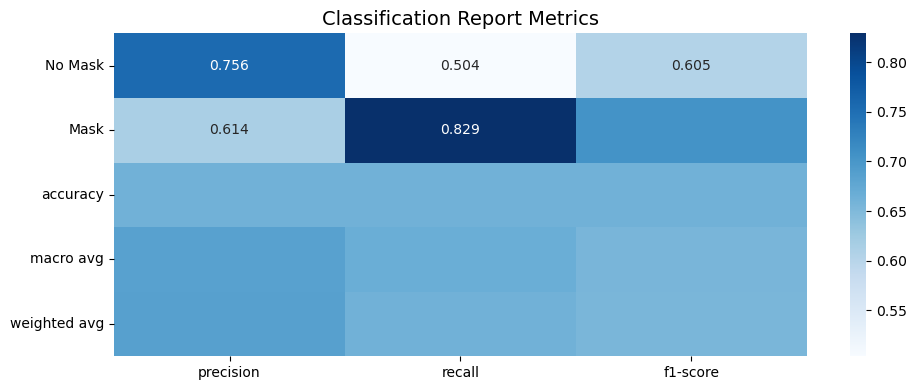

In [11]:
# ======================
# IMPORTS (UPDATED)
# ======================
from sklearn.metrics import classification_report  # <-- THIS WAS MISSING

# ======================
# CLASSIFICATION REPORT (CORRECTED IMPLEMENTATION)
# ======================
# Generate predictions
y_pred = (model.predict(X_test) > 0.5).astype("int")

# Print detailed classification report
print("\n" + "="*60)
print("DETAILED CLASSIFICATION REPORT")
print("="*60)
print(classification_report(y_test, y_pred, 
                          target_names=['No Mask', 'Mask'],
                          digits=4))

# Alternative version with dictionary output for further processing
report_dict = classification_report(y_test, y_pred,
                                 target_names=['No Mask', 'Mask'],
                                 output_dict=True)

# Convert to DataFrame for better visualization
report_df = pd.DataFrame(report_dict).transpose()
print("\nTabular Format:")
print(report_df.to_string(float_format=lambda x: f"{x:.4f}"))

# Visual representation
plt.figure(figsize=(10, 4))
sns.heatmap(pd.DataFrame(report_dict).iloc[:-1, :].T, 
            annot=True, cmap='Blues', fmt='.3f')
plt.title('Classification Report Metrics', fontsize=14)
plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


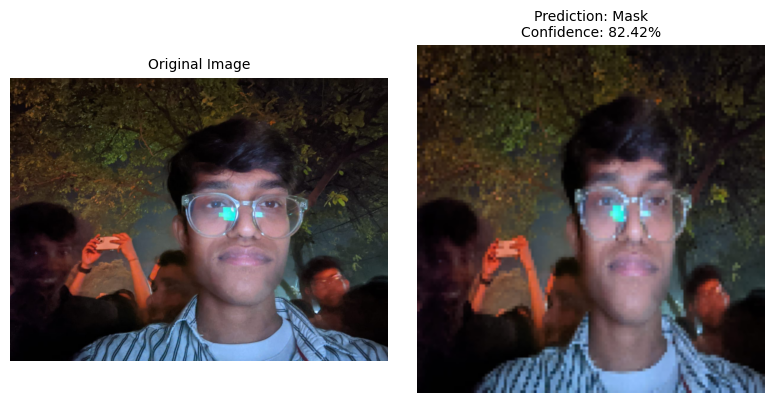

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


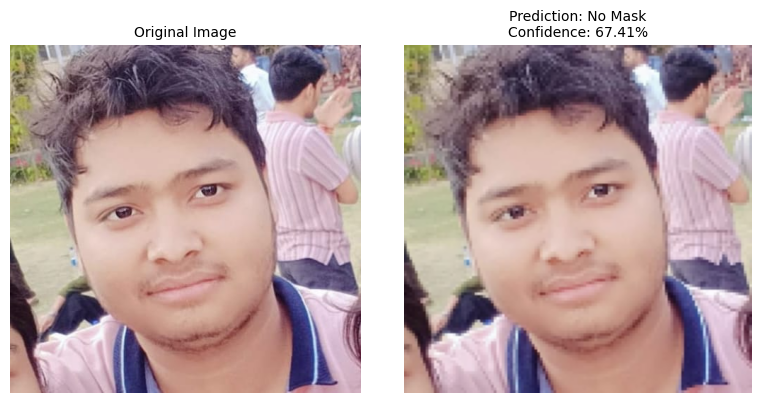

('No Mask', 0.6741083264350891)

In [13]:
# ======================
# PREDICTION FUNCTION
# ======================
def predict_image(image_path, model=model):
    try:
        img = cv2.imread(image_path)
        if img is None:
            raise ValueError("Could not read image")
            
        plt.figure(figsize=(8, 4))
        
        # Original image
        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title("Original Image", fontsize=10)
        plt.axis('off')
        
        # Preprocessed image
        img_resized = cv2.resize(img, (128, 128))
        img_array = img_to_array(img_resized) / 255.0
        img_input = np.expand_dims(img_array, axis=0)
        
        # Prediction
        prediction = model.predict(img_input)[0][0]
        label = "Mask" if prediction > 0.5 else "No Mask"
        confidence = prediction if label == "Mask" else 1 - prediction
        
        plt.subplot(1, 2, 2)
        plt.imshow(cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB))
        plt.title(f"Prediction: {label}\nConfidence: {confidence:.2%}", fontsize=10)
        plt.axis('off')
        
        plt.tight_layout()
        plt.show()
        
        return label, confidence
    
    except Exception as e:
        print(f"Error: {e}")
        return None, None

# Example usage:
predict_image("beeru.jpg")
predict_image("dildar.jpg")